Resolvendo um problema de classificação
===================
## Dados do Curso
**Instituição:** IFES

**Curso:** Mestrado Profissional Computação Aplicada

**Professor:** Francisco de Assis Boldt

**Aluno:** Arthur Chisté Lucas

## Ambiente
**IDE:** MS Visual Studio Code

**Versão Python:** 3.8.3 64bits com anaconda 2020.07


Introdução
Nesta tarefa, será utilizado um dataset contendo dados correlatos à infarto, obtido no site da Kaggle:

https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


url = 'https://github.com/arthurclucas/ReconhecimentoPadroes/blob/main/data/heart_disease_dataset/framingham_heart_disease.csv?raw=true'

url = 'data/life_expectancy_dataset/Life_Expectancy_Data.csv'
dados = pd.read_csv(url)
dados

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Descrição das colunas:

* **Male**: 1 se for homem, 0 se for mulher
* **Age**: Idade do individuo
* **Education**: Nível de educação de 1 a 4
* **CurrentSmoker**: 1 se o individuo for fumante, 0 caso contrário
* **CigsPerDay**: Quantidade de cigarros diários que o individuo fuma
* **BPMeds**: Indicador se o individuo toma remédios de pressão. 1 - Sim, 0 - Não
* **PrevalentStroke**: Indicador se o individuo já sofreu AVC. 1 - Sim, 0 - Não
* **Diabetes**: Indicador se o individuo possui Diabetes. 1 - Sim, 0 - Não
* **TotChol**: Colesterol total
* **SysBP/DiaBP**: Pressão (ex.: 130/80)
* **BMI**: Equivqalente ao IMC
* **HeartRate**: Batidas por minutos
* **Glucose**: Nível de glicose no sangue








Analisando os dados, é possível entender que a coluna TenYearCHD informa se a pessoa teve ou não infarto nos últimos 10 anos (0 - Não, 1 -Sim)

Como todos os dados do dataset são numéricos, preencheremos os nulos com as médidas das colunas, ao invés de desprezá-los.

In [18]:
#dados.fillna(dados.mean(), inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   int64  
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   int64  
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA3D045550>,
      dtype=object)

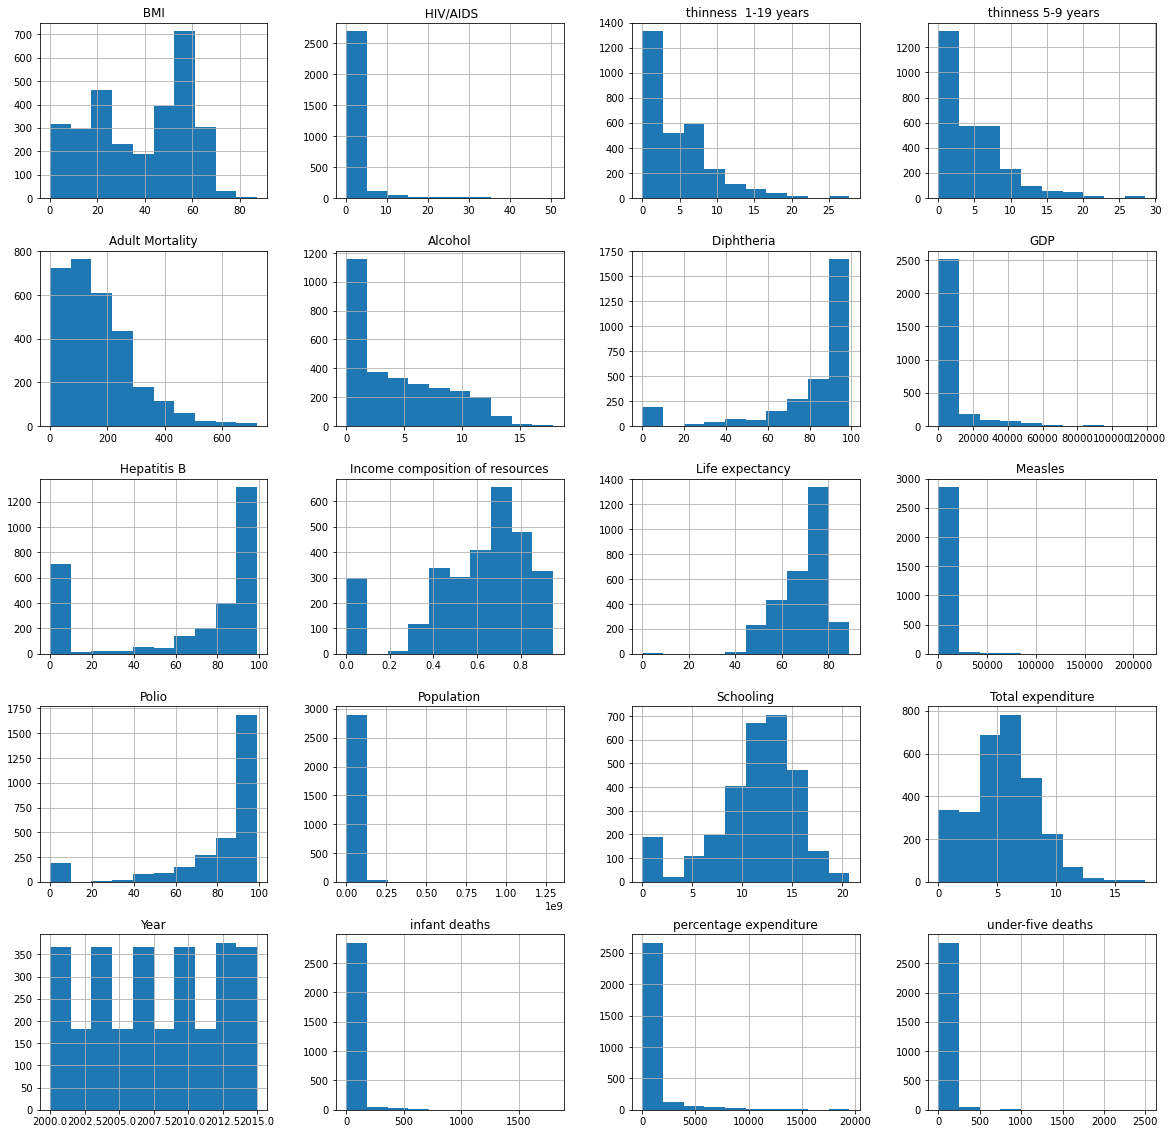

In [22]:
fig = plt.figure(figsize = (20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
dados.hist(ax = ax)

Tendo um dataset não nulo, separaremos os dados para treinar

In [27]:
#y = dados['TenYearCHD']
#X = dados.drop('TenYearCHD', axis=1)

y = dados['Life expectancy ']
X = dados.drop('Life expectancy ', axis=1)

X.shape, y.shape

((2938, 21), (2938,))

In [28]:
modelo = LogisticRegression()
modelo.fit(X, y)
yPred = modelo.predict(X)
acuracia = accuracy_score(y, yPred)
erro = mean_squared_error(y, yPred)
print(f"acurácia: {acuracia}")
print(f"erro: {erro}")
print(f"intercept_: {modelo.intercept_}")
print(f"coef_: {modelo.coef_}")
print(f"ypred: {yPred}")

ValueError: could not convert string to float: 'Developing'

In [6]:
yPred
np.count_nonzero(yPred == 1)

57

In [7]:
a = np.array(y)
np.count_nonzero(a == 1)

644

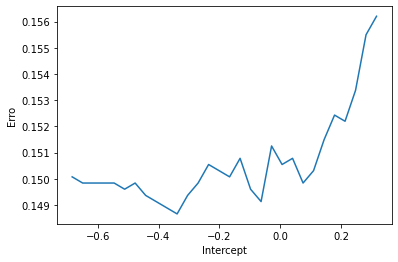

In [12]:
def plotError(modelo, i, delta):
    erros = []
    intercepts = np.linspace(modelo.intercept_-delta, modelo.intercept_+delta, 30)
    intercept_ = modelo.intercept_
    for w in intercepts:
        modelo.intercept_ = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_ = intercept_
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept")
    plt.plot(intercepts, erros)
    plt.show()

def plotError2(modelo, i, delta):
    erros = []
    intercepts = np.linspace(modelo.intercept_-delta, modelo.intercept_+delta, 30)
    intercept_ = modelo.intercept_
    for w in intercepts:
        modelo.intercept_ = w#iterar 
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_ = intercept_
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept")
    plt.plot(intercepts, erros)
    plt.show()

def plot(modelo, i):
    Xi = X.iloc[:, i]
    plt.xlabel(f"{i}: {dados.columns[i]}")
    plt.ylabel("Classificação")
    plt.scatter(Xi, y)
    modelo = LogisticRegression()
    modelo.fit(X, y)
    yPred = modelo.predict(X)
    acuracia = accuracy_score(y, yPred)
    plt.plot(Xi, yPred, 'ro', label=f"acurácia:{acuracia}", alpha=0.5)
    plt.legend()
    plt.show()

def plot2(i):
    Xi = X.iloc[:, i].to_frame()
    plt.xlabel(f"{i}: {dados.columns[i]}")
    plt.ylabel("Classificação")
    plt.scatter(Xi, y)
    modelo = LogisticRegression()
    modelo.fit(Xi, y)
    yPred = modelo.predict(Xi)
    acuracia = accuracy_score(y, yPred)
    plt.plot(Xi, yPred, 'ro', label=f"acurácia:{acuracia}", alpha=0.5)
    plt.legend()
    plt.show()
    
plotError(modelo, 1, 0.5)

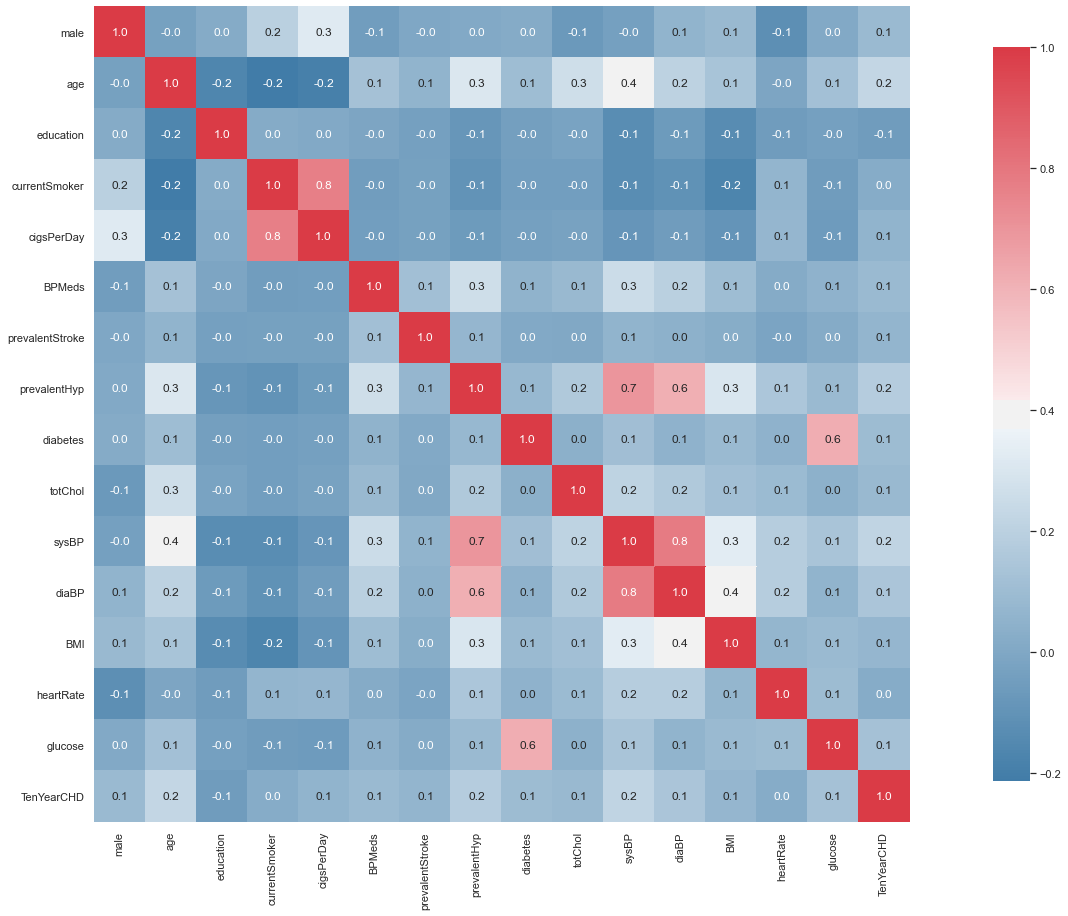

In [56]:
def plot_corr(df):
    corr = df.corr()
    _, ax=plt.subplots(figsize=(30,15))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(df.corr(), cmap=cmap, square=True, cbar_kws = {'shrink': .9}, fmt= '.1f', ax=ax, annot=True)
    
plot_corr(dados)